In [1]:
ls ../rawdata/star_20190125/*coutc.tsv.gz

../rawdata/star_20190125/SvdB12e2-10-Tomo2-4dAA-8umAP-mGstrlds_cbc_trimmed_star_ie2_spliced.coutc.tsv.gz
../rawdata/star_20190125/SvdB12e2-10-Tomo2-4dAA-8umAP-mGstrlds_cbc_trimmed_star_ie2_total.coutc.tsv.gz
../rawdata/star_20190125/SvdB12e2-10-Tomo2-4dAA-8umAP-mGstrlds_cbc_trimmed_star_ie2_unspliced.coutc.tsv.gz
../rawdata/star_20190125/SvdB12e2-11-Tomo2-4dAA-8umAP-mGstrlds_Run1-2_cbc_trimmed_star_ie2_spliced.coutc.tsv.gz
../rawdata/star_20190125/SvdB12e2-11-Tomo2-4dAA-8umAP-mGstrlds_Run1-2_cbc_trimmed_star_ie2_total.coutc.tsv.gz
../rawdata/star_20190125/SvdB12e2-11-Tomo2-4dAA-8umAP-mGstrlds_Run1-2_cbc_trimmed_star_ie2_unspliced.coutc.tsv.gz
../rawdata/star_20190125/SvdB12e2-12-Tomo2-4and3dAA-8umAP-mGstrlds-Run1-2_cbc_trimmed_star_ie2_spliced.coutc.tsv.gz
../rawdata/star_20190125/SvdB12e2-12-Tomo2-4and3dAA-8umAP-mGstrlds-Run1-2_cbc_trimmed_star_ie2_total.coutc.tsv.gz
../rawdata/star_20190125/SvdB12e2-12-Tomo2-4and3dAA-8umAP-mGstrlds-Run1-2_cbc_trimmed_star_ie2_unspliced.coutc.tsv.gz
.

# Important functions

In [2]:
def getPlotTotalReads(df):
    ercc = [idx for idx in df.index if 'ERCC' in idx]
    mt = [idx for idx in df.index if '_chrM' in idx]
    if len(mt) == 0:
        mt = [idx for idx in df.index if '_MT' in idx]
    genes = [idx for idx in df.index if idx not in ercc and idx not in mt]
    plt.bar(range(len(df.columns)), df.loc[genes].sum()+1, log = 'y')
    plt.bar(range(len(df.columns)), df.loc[mt].sum()+1, log = 'y')
    plt.bar(range(len(df.columns)), df.loc[ercc].sum()+1, log = 'y')
    plt.xticks(range(len(df.columns)), df.columns)
    plt.ylabel('total')
    plt.xlabel('well')
    plt.legend(['genes', 'mt', 'ercc'])
    return plt

In [3]:
def getCBT(dfs):
    dfc, dfb, dft = dfs
    fig = plt.figure(figsize=(15,4))
    plt.subplot(131)
    plt1 = getPlotTotalReads(dfc)
    plt1.title('counts')
    plt.subplot(132)
    plt2 = getPlotTotalReads(dfb)
    plt2.title('barcodes')
    plt.subplot(133)
    plt3 = getPlotTotalReads(dft)
    plt3.title('transcripts')
    return plt.show()

In [4]:
def plotGeneT(df):
    gene = [idx for idx in df.index if 'T_' in idx]
    plt.bar(range(len(df.columns)), df.loc[gene].sum())
    return plt.show()

In [5]:
def renameColumns(df, label):
    m = len(str(len(df.columns)))
    df.columns = ['-'.join([str(i+1).zfill(m),label]) for i in range(len(df.columns))]
    return df

In [6]:
def readData(filename):
    dfc = read_csv(filename + '.coutc.tsv.gz', sep = '\t', index_col=0)
    dfb = read_csv(filename + '.coutb.tsv.gz', sep = '\t', index_col=0)
    dft = read_csv(filename + '.coutt.tsv.gz', sep = '\t', index_col=0)
    dfc.columns = [c.zfill(3) for c in dfc.columns]; 
    dfb.columns = [c.zfill(3) for c in dfb.columns]; 
    dft.columns = [c.zfill(3) for c in dft.columns]; 
    dfc = dfc[sorted(dfc.columns)]; 
    dfb = dfb[sorted(dfb.columns)]
    dft = dft[sorted(dft.columns)]
    dfc = dfc[dfc.columns[:97]]
    dfb = dfb[dfb.columns[:97]]
    dft = dft[dft.columns[:97]]
    return dfc, dfb, dft

In [7]:
def mergeGstrls(dfs1, col1, lab1, dfs2, col2, lab2):
    dfc1, dfb1, dft1 = dfs1    
    dfca = dfc1[col1]; dfca.columns = ['-'.join([str(c),str(lab1)]) for c in dfca.columns]
    dfba = dfb1[col1]; dfba.columns = ['-'.join([str(c),str(lab1)]) for c in dfba.columns]
    dfta = dft1[col1]; dfta.columns = ['-'.join([str(c),str(lab1)]) for c in dfta.columns]
    
    dfc2, dfb2, dft2 = dfs2
    dfcb = dfc2[col2]; dfcb.columns = ['-'.join([str(c),str(lab2)]) for c in dfcb.columns]
    dfbb = dfb2[col2]; dfbb.columns = ['-'.join([str(c),str(lab2)]) for c in dfbb.columns]
    dftb = dft2[col2]; dftb.columns = ['-'.join([str(c),str(lab2)]) for c in dftb.columns]

    dfc = dfca.merge(dfcb, how = 'outer', left_index = True, right_index = True)
    dfb = dfba.merge(dfbb, how = 'outer', left_index = True, right_index = True)
    dft = dfta.merge(dftb, how = 'outer', left_index = True, right_index = True)
    
    dfc = dfc.fillna(0)
    dfb = dfb.fillna(0)
    dft = dft.fillna(0)
    return dfc, dfb, dft

In [8]:
def splitGst(dfs, col):
    return [df[col] for df in dfs]

In [9]:
def renameGst(dfs, label, name):
    dfc, dfb, dft = dfs
    cols = dfc.columns
    if label == 'PA':
        cols = dfc.columns[::-1]
    dfc = renameColumns(dfc[cols], name)
    dfb = renameColumns(dfb[cols], name)
    dft = renameColumns(dft[cols], name)
    return dfc, dfb, dft

In [10]:
def savedfs(dfs, name):
    dfc, dfb, dft = dfs
    dfc.to_csv(name + '.coutc.tsv', sep = '\t')
    dfb.to_csv(name + '.coutb.tsv', sep = '\t')
    dft.to_csv(name + '.coutt.tsv', sep = '\t')
    return

In [11]:
def removeGenes(df):
    genes = ['ERCC','chrM', 'Kcnq1ot1', 'Mir5109', 'Lars2','Malat1', 'Rn45s', 'Rpl', 'Rps','__MT']
    exclude = [idx for idx in df.index for g in genes if g in idx]
    return df.loc[[idx for idx in df.index if idx not in exclude]]

def removeGmGenes(df):
    g = []
    for idx in df.index:
        if 'Gm' in idx:
            gid = idx.rsplit('Gm')[1].rsplit('__')[0]
            if sum([n in [str(r) for r in range(10)] for n in gid]) == len(gid):
                g.append(idx)
    return df.loc[[idx for idx in df.index if idx not in g]]

# Rawdata for mG1, mG2, mG3
All contained in the same run (original OUD2255, OUD2280 for deeper sequencing). mG1 is in one block, mG2 and mG3 where together in another block. 

In [12]:
f = '../rawdata/star_20190125/merge_SvdB12e1-1-2-Tomo1-5dAA-mG_oud2555_oud2280_cbc_trimmed_star_ie2_unspliced'
dfstaru = readData(f)

In [13]:
f = '../rawdata/star_20190125/merge_SvdB12e1-1-2-Tomo1-5dAA-mG_oud2555_oud2280_cbc_trimmed_star_ie2_spliced'
dfstars = readData(f)

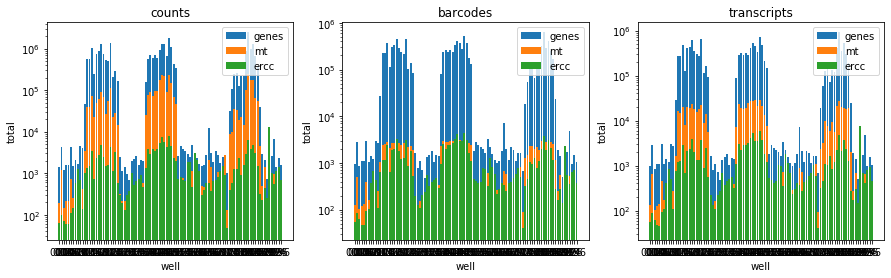

In [14]:
# star spliced
getCBT(dfstars)
#getCBT(dfstaru)

In [15]:
dfstars[2].columns[dfstars[2].sum()>1e4]

Index(['012', '013', '014', '015', '016', '017', '018', '019', '020', '021',
       '022', '023', '024', '025', '026', '038', '039', '040', '041', '042',
       '043', '044', '045', '046', '047', '048', '049', '050', '051', '074',
       '075', '076', '077', '078', '079', '080', '081', '082', '083', '084',
       '085', '086', '087'],
      dtype='object')

In [16]:
col_mg01 = [str(i).zfill(3) for i in range(6, 35)]
col_mg02 = [str(i).zfill(3) for i in range(31, 60)]
col_mg03 = [str(i).zfill(3) for i in range(65, 97)]

In [17]:
dfstars_g1 = splitGst(dfstars, col_mg01)
dfstars_g2 = splitGst(dfstars, col_mg02)
dfstars_g3 = splitGst(dfstars, col_mg03)

dfstaru_g1 = splitGst(dfstaru, col_mg01)
dfstaru_g2 = splitGst(dfstaru, col_mg02)
dfstaru_g3 = splitGst(dfstaru, col_mg03)

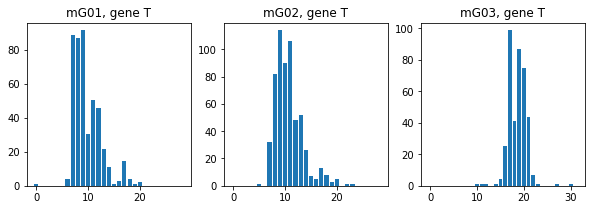

In [18]:
g = [idx for idx in dfstars_g1[-1].index if 'T_' in idx][0]
plt.figure(figsize=(10,3))
plt.subplot(131)
plt.bar(range(len(dfstars_g1[-1].columns)), dfstars_g1[-1].loc[g]); plt.title('mG01, gene T')
plt.subplot(132)
plt.bar(range(len(dfstars_g2[-1].columns)), dfstars_g2[-1].loc[g]); plt.title('mG02, gene T')
plt.subplot(133)
plt.bar(range(len(dfstars_g3[-1].columns)), dfstars_g3[-1].loc[g]); plt.title('mG03, gene T')
plt.show()

In [19]:
dfstars_g1 = renameGst(dfstars_g1, 'PA', 'mG01')
dfstars_g2 = renameGst(dfstars_g2, 'PA', 'mG02')
dfstars_g3 = renameGst(dfstars_g3, 'AP', 'mG03')

dfstaru_g1 = renameGst(dfstaru_g1, 'PA', 'mG01')
dfstaru_g2 = renameGst(dfstaru_g2, 'PA', 'mG02')
dfstaru_g3 = renameGst(dfstaru_g3, 'AP', 'mG03')

# rawdata for mG04, mG05

In [20]:
plate5 = '../rawdata/star_20190125/SvdB12e2-5-Tomo2-5dAA-8umAP-Gastruloids_cbc_trimmed_star_ie2_spliced'
plate6 = '../rawdata/star_20190125/SvdB12e2-6-Tomo2-5dAA-8umAP-Gastruloids_cbc_trimmed_star_ie2_spliced'
plate7 = '../rawdata/star_20190125/SvdB12e2-7-Tomo2-5dAA-8umAP-Gastruloids_cbc_trimmed_star_ie2_spliced'

dfstars_p5 = readData(plate5)
dfstars_p6 = readData(plate6)
dfstars_p7 = readData(plate7)

In [21]:
plate5 = '../rawdata/star_20190125/SvdB12e2-5-Tomo2-5dAA-8umAP-Gastruloids_cbc_trimmed_star_ie2_unspliced'
plate6 = '../rawdata/star_20190125/SvdB12e2-6-Tomo2-5dAA-8umAP-Gastruloids_cbc_trimmed_star_ie2_unspliced'
plate7 = '../rawdata/star_20190125/SvdB12e2-7-Tomo2-5dAA-8umAP-Gastruloids_cbc_trimmed_star_ie2_unspliced'

dfstaru_p5 = readData(plate5)
dfstaru_p6 = readData(plate6)
dfstaru_p7 = readData(plate7)

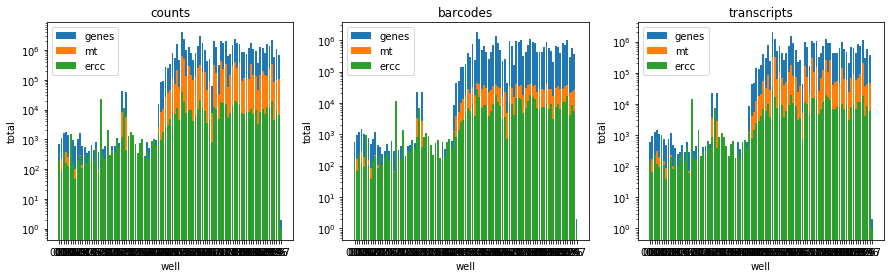

In [22]:
getCBT(dfstars_p5)
#getCBT(dfstaru_p5)

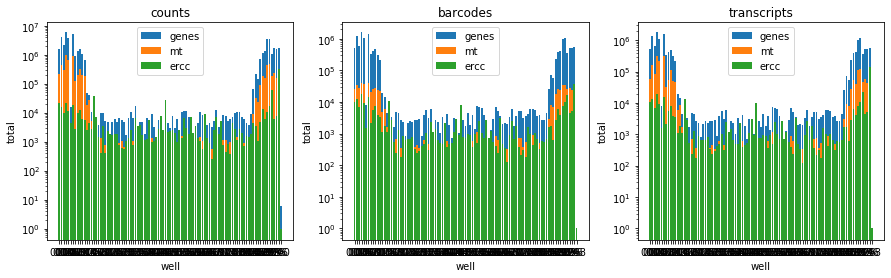

In [23]:
getCBT(dfstars_p6)
#getCBT(dfstaru_p6)

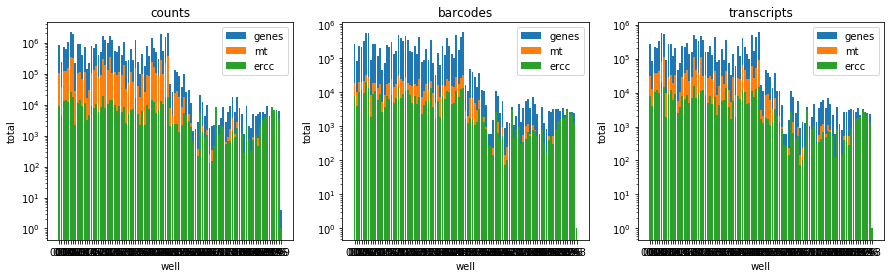

In [24]:
getCBT(dfstars_p7)
#getCBT(dfstaru_p7)

In [25]:
print(dfstars_p5[-1].columns[dfstars_p5[-1].sum()>1e4])
print(dfstars_p6[-1].columns[dfstars_p6[-1].sum()>1e4])
print(dfstars_p7[-1].columns[dfstars_p7[-1].sum()>2e4])

Index(['019', '028', '030', '044', '045', '046', '047', '048', '049', '050',
       '051', '052', '053', '054', '055', '056', '057', '058', '059', '060',
       '061', '062', '063', '064', '065', '066', '067', '068', '069', '070',
       '071', '072', '073', '074', '075', '076', '077', '078', '079', '080',
       '081', '082', '083', '084', '085', '086', '087', '088', '089', '090',
       '091', '092', '093', '094', '095', '096'],
      dtype='object')
Index(['001', '002', '003', '004', '005', '006', '007', '008', '009', '010',
       '011', '012', '013', '014', '016', '047', '055', '085', '086', '087',
       '088', '089', '090', '091', '092', '093', '094', '095', '096'],
      dtype='object')
Index(['001', '002', '003', '004', '005', '006', '007', '008', '009', '010',
       '011', '012', '013', '014', '015', '016', '017', '018', '019', '020',
       '021', '022', '023', '024', '025', '026', '027', '028', '029', '030',
       '031', '032', '033', '034', '035', '036', '037', '038', '0

In [26]:
dfstars_p5[-1][[str(i).zfill(3) for i in range(45,97)]].sum().sort_values().head()

045     48408.019623
067     48834.994744
046     55600.483066
047    155421.666597
048    158065.616004
dtype: float64

In [27]:
col5mg4 = [str(i).zfill(3) for i in range(38,97) if i is not 67]
col6mg4 = [str(i).zfill(3) for i in range(1,23) if i is not 6]
col6mg5 = [str(i).zfill(3) for i in range(75,97)]
col7mg5 = [str(i).zfill(3) for i in range(1,66) if i not in [49, 50, 53, 54]]

# For QC plots
# col5mg4 = [str(i).zfill(3) for i in range(24,97)]
# col6mg4 = [str(i).zfill(3) for i in range(1,35)]
# col6mg5 = [str(i).zfill(3) for i in range(65,97)]
# col7mg5 = [str(i).zfill(3) for i in range(1,76)]

In [28]:
dfstars_g4 = mergeGstrls(dfstars_p5, col5mg4, 'p5', dfstars_p6, col6mg4, 'p6')
dfstars_g5 = mergeGstrls(dfstars_p6, col6mg5, 'p6', dfstars_p7, col7mg5, 'p7')

dfstaru_g4 = mergeGstrls(dfstaru_p5, col5mg4, 'p5', dfstaru_p6, col6mg4, 'p6')
dfstaru_g5 = mergeGstrls(dfstaru_p6, col6mg5, 'p6', dfstaru_p7, col7mg5, 'p7')

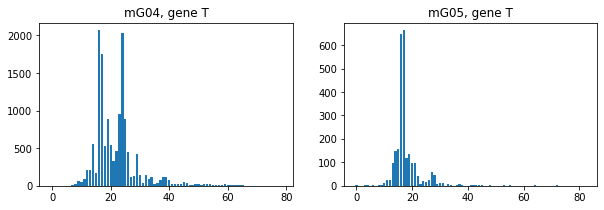

In [29]:
g = [idx for idx in dfstars_g4[-1].index if 'T_' in idx][0]
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.bar(range(len(dfstars_g4[-1].columns)), dfstars_g4[-1].loc[g]); plt.title('mG04, gene T')
plt.subplot(122)
plt.bar(range(len(dfstars_g5[-1].columns)), dfstars_g5[-1].loc[g]); plt.title('mG05, gene T')
plt.show()

In [30]:
dfstars_g4 = renameGst(dfstars_g4, 'PA', 'mG04')
dfstars_g5 = renameGst(dfstars_g5, 'PA', 'mG05')

dfstaru_g4 = renameGst(dfstaru_g4, 'PA', 'mG04')
dfstaru_g5 = renameGst(dfstaru_g5, 'PA', 'mG05')

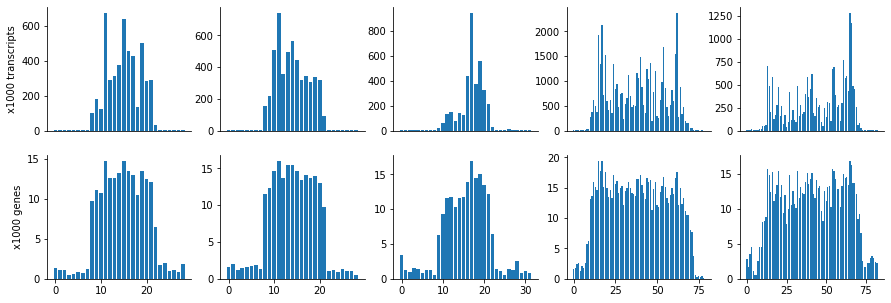

In [34]:
fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (15,5))

for i, df in enumerate([dfstars_g1,dfstars_g2,dfstars_g3,dfstars_g4,dfstars_g5]):
    ax[0][i].bar(range(len(df[2].columns)), df[2].sum()/1e3)
    ax[0][i].spines['top'].set_visible(False)
    ax[0][i].spines['right'].set_visible(False)
    ax[0][i].set_xticks([]); ax[0][i].set_xticklabels([])
    if i == 0:
        ax[0][i].set_ylabel('x1000 transcripts')

for i, df in enumerate([dfstars_g1,dfstars_g2,dfstars_g3,dfstars_g4,dfstars_g5]):
    ax[1][i].bar(range(len(df[2].columns)), (df[2]>0).sum()/1e3)
    ax[1][i].spines['top'].set_visible(False)
    ax[1][i].spines['right'].set_visible(False)
    if i == 0:
        ax[1][i].set_ylabel('x1000 genes')

plt.savefig('../results_postRevJan19/SuppFig/barplot_counts_genes.pdf', bbox_inches = 'tight')
plt.show()

In [58]:
# ! mkdir ../results_postRevJan19/SuppFig

In [34]:
# source data
writer = pd.ExcelWriter('/Users/anna/Dropbox/gastruloids/WritingPapers/4thSubmission_Nature/source_data/edf3a.xlsx', engine='xlsxwriter')

names = ['g1_E14-20um_trans','g2_E14-20um_trans','g3_E14-20um_trans','g4_E14-08um_trans','g5_E14-08um_trans']
for i, df in enumerate([dfstars_g1,dfstars_g2,dfstars_g3,dfstars_g4,dfstars_g5]):
    (df[2].sum()).to_excel(writer, sheet_name = names[i])
names = ['g1_E14-20um_genes','g2_E14-20um_genes','g3_E14-20um_genes','g4_E14-08um_genes','g5_E14-08um_genes']
for i, df in enumerate([dfstars_g1,dfstars_g2,dfstars_g3,dfstars_g4,dfstars_g5]):
    ((df[2]>0).sum()).to_excel(writer, sheet_name = names[i])

writer.close()


# mG07--mG11

Plates 10, 11, first haf of 12 contain sections from the one block that contained 3 gastruloids (4d AA) (mG7-mG9). 
Second half of 12 and 13: one block with 2 gastruloids (3d old). Started with plate 13, remaining sections are in the second half of plate 12.

In [31]:
plate10 = '../rawdata/star_20190125/SvdB12e2-10-Tomo2-4dAA-8umAP-mGstrlds_cbc_trimmed_star_ie2_unspliced'
plate11 = '../rawdata/star_20190125/SvdB12e2-11-Tomo2-4dAA-8umAP-mGstrlds_Run1-2_cbc_trimmed_star_ie2_unspliced'
plate12 = '../rawdata/star_20190125/SvdB12e2-12-Tomo2-4and3dAA-8umAP-mGstrlds-Run1-2_cbc_trimmed_star_ie2_unspliced'
plate13 = '../rawdata/star_20190125/SvdB12e2-13-Tomo2-3dAA-8umAP-mGstrlds-Run1-2_cbc_trimmed_star_ie2_unspliced'

dfstaru_p10 = readData(plate10)
dfstaru_p11 = readData(plate11)
dfstaru_p12 = readData(plate12)
dfstaru_p13 = readData(plate13)

plate10 = '../rawdata/star_20190125/SvdB12e2-10-Tomo2-4dAA-8umAP-mGstrlds_cbc_trimmed_star_ie2_spliced'
plate11 = '../rawdata/star_20190125/SvdB12e2-11-Tomo2-4dAA-8umAP-mGstrlds_Run1-2_cbc_trimmed_star_ie2_spliced'
plate12 = '../rawdata/star_20190125/SvdB12e2-12-Tomo2-4and3dAA-8umAP-mGstrlds-Run1-2_cbc_trimmed_star_ie2_spliced'
plate13 = '../rawdata/star_20190125/SvdB12e2-13-Tomo2-3dAA-8umAP-mGstrlds-Run1-2_cbc_trimmed_star_ie2_spliced'

dfstars_p10 = readData(plate10)
dfstars_p11 = readData(plate11)
dfstars_p12 = readData(plate12)
dfstars_p13 = readData(plate13)

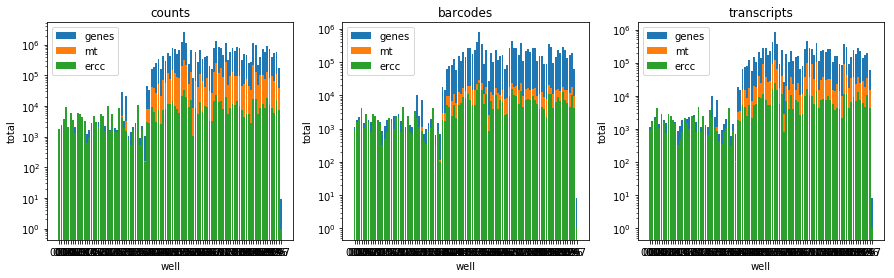

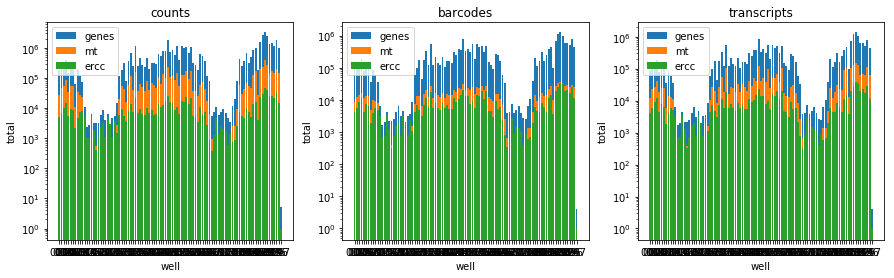

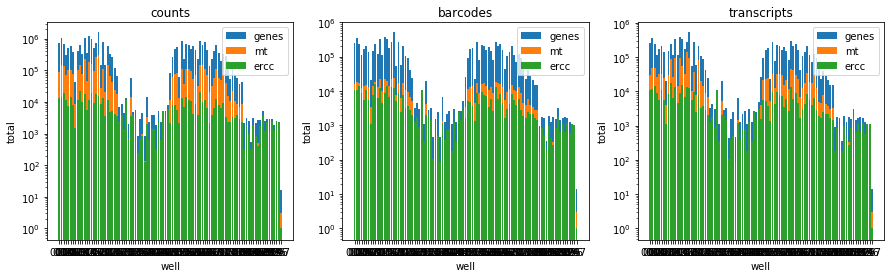

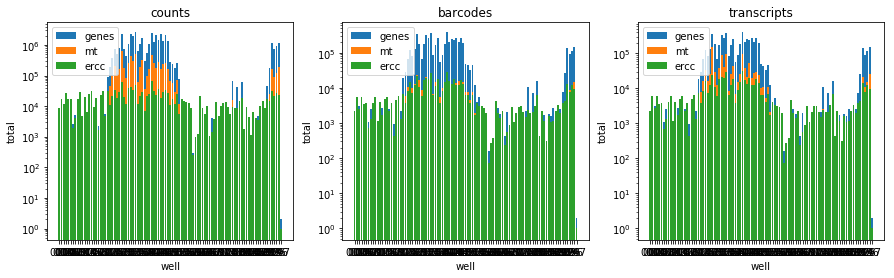

In [32]:
getCBT(dfstars_p10)
#getCBT(dfstaru_p10)

getCBT(dfstars_p11)
#getCBT(dfstaru_p11)

getCBT(dfstars_p12)
#getCBT(dfstaru_p12)

getCBT(dfstars_p13)
#getCBT(dfstaru_p13)

In [33]:
print(dfstars_p10[-1].columns[dfstars_p10[-1].sum()>2e4])
print(dfstars_p11[-1].columns[dfstars_p11[-1].sum()>1.5e4])
print(dfstars_p12[-1].columns[dfstars_p12[-1].sum()>1.5e4])
print(dfstars_p13[-1].columns[dfstars_p13[-1].sum()>1e4])

Index(['039', '041', '042', '043', '044', '045', '046', '047', '048', '049',
       '050', '051', '052', '053', '054', '055', '056', '057', '058', '059',
       '060', '061', '062', '063', '064', '065', '066', '067', '068', '069',
       '070', '071', '072', '073', '074', '075', '076', '077', '078', '079',
       '080', '081', '082', '083', '084', '085', '086', '087', '088', '089',
       '090', '091', '092', '093', '094', '095', '096'],
      dtype='object')
Index(['001', '002', '003', '004', '005', '006', '007', '008', '009', '010',
       '011', '027', '028', '029', '030', '031', '032', '033', '034', '035',
       '036', '037', '038', '039', '040', '041', '042', '043', '044', '045',
       '046', '047', '048', '049', '050', '051', '052', '053', '054', '055',
       '056', '057', '058', '059', '060', '061', '062', '063', '064', '065',
       '066', '078', '079', '080', '081', '082', '083', '084', '085', '086',
       '087', '088', '089', '090', '091', '092', '093', '094', '095', '096

In [34]:
mg7col10 = [str(i).zfill(3) for i in range(39,97) if i != 40]
mg7col11 = [str(i).zfill(3) for i in range(1,13)]
dfstars_g7 = mergeGstrls(dfstars_p10, mg7col10, 'p10', dfstars_p11, mg7col11, 'p11')
dfstaru_g7 = mergeGstrls(dfstaru_p10, mg7col10, 'p10', dfstaru_p11, mg7col11, 'p11')

In [35]:
mg8col = [str(i).zfill(3) for i in range(26,67)]
dfstars_g8 = splitGst(dfstars_p11, mg8col)
dfstaru_g8 = splitGst(dfstaru_p11, mg8col)

In [36]:
mg9col11 = [str(i).zfill(3) for i in range(77,97)]
mg9col12 = [str(i).zfill(3) for i in range(1,27)]
dfstars_g9 = mergeGstrls(dfstars_p11, mg9col11, 'p11', dfstars_p12, mg9col12, 'p12')
dfstaru_g9 = mergeGstrls(dfstaru_p11, mg9col11, 'p11', dfstaru_p12, mg9col12, 'p12')

In [37]:
mg10col = [str(i).zfill(3) for i in range(19,56)]
dfstaru_g10 = splitGst(dfstaru_p13, mg10col)
dfstars_g10 = splitGst(dfstars_p13, mg10col)

In [38]:
mg11col13 = [str(i).zfill(3) for i in range(91,97)]
mg11col12 = [str(i).zfill(3) for i in range(49,82)]
dfstaru_g11 = mergeGstrls(dfstaru_p13, mg11col13, 'p13', dfstaru_p12, mg11col12, 'p12')
dfstars_g11 = mergeGstrls(dfstars_p13, mg11col13, 'p13', dfstars_p12, mg11col12, 'p12')

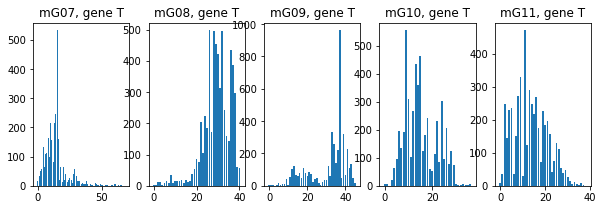

In [39]:
g = [idx for idx in dfstars_g7[-1].index if 'T_' in idx][0]
plt.figure(figsize=(10,3))
plt.subplot(151)
plt.bar(range(len(dfstars_g7[-1].columns)), dfstars_g7[-1].loc[g]); plt.title('mG07, gene T')
plt.subplot(152)
plt.bar(range(len(dfstars_g8[-1].columns)), dfstars_g8[-1].loc[g]); plt.title('mG08, gene T')
plt.subplot(153)
plt.bar(range(len(dfstars_g9[-1].columns)), dfstars_g9[-1].loc[g]); plt.title('mG09, gene T')
plt.subplot(154)
plt.bar(range(len(dfstars_g10[-1].columns)), dfstars_g10[-1].loc[g]); plt.title('mG10, gene T')
plt.subplot(155)
plt.bar(range(len(dfstars_g11[-1].columns)), dfstars_g11[-1].loc[g]); plt.title('mG11, gene T')

plt.show()

In [40]:
dfstars_g7 = renameGst(dfstars_g7, 'PA', 'mG07')
dfstaru_g7 = renameGst(dfstaru_g7, 'PA', 'mG07')

dfstars_g8 = renameGst(dfstars_g8, 'AP', 'mG08')
dfstaru_g8 = renameGst(dfstaru_g8, 'AP', 'mG08')

dfstars_g9 = renameGst(dfstars_g9, 'AP', 'mG09')
dfstaru_g9 = renameGst(dfstaru_g9, 'AP', 'mG09')

dfstars_g10 = renameGst(dfstars_g10, 'PA', 'mG10')
dfstaru_g10 = renameGst(dfstaru_g10, 'PA', 'mG10')

dfstars_g11 = renameGst(dfstars_g11, 'PA', 'mG11')
dfstaru_g11 = renameGst(dfstaru_g11, 'PA', 'mG11')

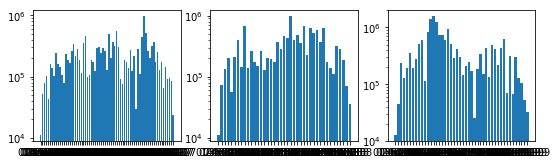

In [43]:
plt.figure(figsize=(3*3,2.4))
for i, df in enumerate([dfstars_g7[-1],dfstars_g8[-1],dfstars_g9[-1]]):
    plt.subplot(1,3,i+1)
    cnt = df.sum()
    plt.bar(cnt.keys(), cnt)
    plt.yscale('log')
plt.show()

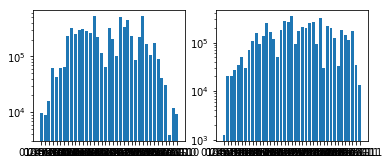

In [45]:
plt.figure(figsize=(3*2,2.4))
for i, df in enumerate([dfstars_g10[-1],dfstars_g11[-1]]):
    plt.subplot(1,2,i+1)
    cnt = df.sum()
    plt.bar(cnt.keys(), cnt)
    plt.yscale('log')
plt.show()

# output files

In [46]:
savedfs(dfstars_g1, '../mG01-20umAP-5d/rawdata/mG01_trim_star_spliced_jan19')
savedfs(dfstars_g2, '../mG02-20umAP-5d/rawdata/mG02_trim_star_spliced_jan19')
savedfs(dfstars_g3, '../mG03-20umAP-5d/rawdata/mG03_trim_star_spliced_jan19')
savedfs(dfstars_g4, '../mG04-08umAP-5d/rawdata/mG04_trim_star_spliced_jan19')
savedfs(dfstars_g5, '../mG05-08umAP-5d/rawdata/mG05_trim_star_spliced_jan19')
savedfs(dfstars_g7, '../mG07-08umAP-4d/rawdata/mG07_trim_star_spliced_jan19')
savedfs(dfstars_g8, '../mG08-08umAP-4d/rawdata/mG08_trim_star_spliced_jan19')
savedfs(dfstars_g9, '../mG09-08umAP-4d/rawdata/mG09_trim_star_spliced_jan19')
savedfs(dfstars_g10, '../mG10-08umAP-3d/rawdata/mG10_trim_star_spliced_jan19')
savedfs(dfstars_g11, '../mG11-08umAP-3d/rawdata/mG11_trim_star_spliced_jan19')

savedfs(dfstaru_g1, '../mG01-20umAP-5d/rawdata/mG01_trim_star_unspliced_jan19')
savedfs(dfstaru_g2, '../mG02-20umAP-5d/rawdata/mG02_trim_star_unspliced_jan19')
savedfs(dfstaru_g3, '../mG03-20umAP-5d/rawdata/mG03_trim_star_unspliced_jan19')
savedfs(dfstaru_g4, '../mG04-08umAP-5d/rawdata/mG04_trim_star_unspliced_jan19')
savedfs(dfstaru_g5, '../mG05-08umAP-5d/rawdata/mG05_trim_star_unspliced_jan19')
savedfs(dfstaru_g7, '../mG07-08umAP-4d/rawdata/mG07_trim_star_unspliced_jan19')
savedfs(dfstaru_g8, '../mG08-08umAP-4d/rawdata/mG08_trim_star_unspliced_jan19')
savedfs(dfstaru_g9, '../mG09-08umAP-4d/rawdata/mG09_trim_star_unspliced_jan19')
savedfs(dfstaru_g10, '../mG10-08umAP-3d/rawdata/mG10_trim_star_unspliced_jan19')
savedfs(dfstaru_g11, '../mG11-08umAP-3d/rawdata/mG11_trim_star_unspliced_jan19')
